In [2]:
# using Vec
# using Compat

using AutomotiveDrivingModels
using AutoViz
using Reactive
using Interact

# using PyPlot

## Design Racetrack (Roadway)

In [5]:
nlanes = 1
road_length = 100.0
lane_width = 4.0*DEFAULT_LANE_WIDTH
radius = 45.0
ncurvepts_per_turn = 25
lane_width=DEFAULT_LANE_WIDTH
boundary_leftmost=LaneBoundary(:solid, :white)
boundary_rightmost=LaneBoundary(:solid, :white)
boundary_middle=LaneBoundary(:broken, :white)


ncurvepts_per_turn ≥ 2 || error("must have at least 2 pts per turn")

A = VecE2(road_length, radius)
B = VecE2(road_length, width + radius)
C = VecE2(0.0, width + radius)
D = VecE2(0.0, radius)

seg1 = RoadSegment(1, Array(Lane, nlanes))
seg2 = RoadSegment(2, Array(Lane, nlanes))
seg3 = RoadSegment(3, Array(Lane, nlanes))
seg4 = RoadSegment(4, Array(Lane, nlanes))

for i in 1 : nlanes
    curvepts1 = Array(CurvePt, ncurvepts_per_turn)
    curvepts2 = Array(CurvePt, ncurvepts_per_turn)
    curvepts3 = Array(CurvePt, ncurvepts_per_turn)
    curvepts4 = Array(CurvePt, ncurvepts_per_turn)

    r = radius + lane_width*(i-1)
    for j in 1:ncurvepts_per_turn
        t = (j-1)/(ncurvepts_per_turn-1) # ∈ [0,1]
        s = r*π/2*t
        curvepts1[j] = CurvePt(VecSE2(A + Vec.polar(r, lerp(-π/2,  0.0, t)), lerp(0.0,π/2,t)),  s)
        curvepts2[j] = CurvePt(VecSE2(B + Vec.polar(r, lerp( 0.0,  π/2, t)), lerp(π/2,π,  t)),  s)
        curvepts3[j] = CurvePt(VecSE2(C + Vec.polar(r, lerp( π/2,  π,   t)), lerp(π, 3π/2,t)),  s)
        curvepts4[j] = CurvePt(VecSE2(D + Vec.polar(r, lerp( π,   3π/2, t)), lerp(3π/2,2π,t)),  s)
    end

    laneindex = nlanes-i+1
    tag1 = LaneTag(1,laneindex)
    tag2 = LaneTag(2,laneindex)
    tag3 = LaneTag(3,laneindex)
    tag4 = LaneTag(4,laneindex)

    boundary_left = (laneindex == nlanes ? boundary_leftmost : boundary_middle)
    boundary_right = (laneindex == 1 ? boundary_rightmost : boundary_middle)
    curveind_lo = CurveIndex(1,0.0)
    curveind_hi = CurveIndex(ncurvepts_per_turn-1,1.0)

    seg1.lanes[laneindex] = Lane(tag1, curvepts1, width=lane_width,
    boundary_left=LaneBoundary(:solid,:white), boundary_right=LaneBoundary(:solid,:white),
                                  next = RoadIndex(curveind_lo, tag2),
                                  prev = RoadIndex(curveind_hi, tag4),
                                 )
    seg2.lanes[laneindex] = Lane(tag2, curvepts2, width=lane_width,
    boundary_left=LaneBoundary(:solid,:yellow), boundary_right=LaneBoundary(:solid,:yellow),
                                  next = RoadIndex(curveind_lo, tag3),
                                  prev = RoadIndex(curveind_hi, tag1),
                                 )
    seg3.lanes[laneindex] = Lane(tag3, curvepts3, width=lane_width,
    boundary_left=LaneBoundary(:solid,:white), boundary_right=LaneBoundary(:solid,:white),
                                  next = RoadIndex(curveind_lo, tag4),
                                  prev = RoadIndex(curveind_hi, tag2),
                                 )
    seg4.lanes[laneindex] = Lane(tag4, curvepts4, width=lane_width,
    boundary_left=LaneBoundary(:solid,:yellow), boundary_right=LaneBoundary(:solid,:yellow),
                                  next = RoadIndex(curveind_lo, tag1),
                                  prev = RoadIndex(curveind_hi, tag3),
                                 )
end

retval = Roadway()
push!(retval.segments, seg1)
push!(retval.segments, seg2)
push!(retval.segments, seg3)
push!(retval.segments, seg4)
# retval



4-element Array{AutomotiveDrivingModels.AutoCore.RoadSegment,1}:
 AutomotiveDrivingModels.AutoCore.RoadSegment(1,AutomotiveDrivingModels.AutoCore.Lane[AutomotiveDrivingModels.AutoCore.Lane(LaneTag(1, 1),AutomotiveDrivingModels.AutoCore.CurvePt[CurvePt({100.000, 0.000, 0.000}, 0.000, NaN, NaN),CurvePt({102.943, 0.096, 0.065}, 2.945, NaN, NaN),CurvePt({105.874, 0.385, 0.131}, 5.890, NaN, NaN),CurvePt({108.779, 0.865, 0.196}, 8.836, NaN, NaN),CurvePt({111.647, 1.533, 0.262}, 11.781, NaN, NaN),CurvePt({114.465, 2.388, 0.327}, 14.726, NaN, NaN),CurvePt({117.221, 3.425, 0.393}, 17.671, NaN, NaN),CurvePt({119.903, 4.641, 0.458}, 20.617, NaN, NaN),CurvePt({122.500, 6.029, 0.524}, 23.562, NaN, NaN),CurvePt({125.001, 7.584, 0.589}, 26.507, NaN, NaN)  …  CurvePt({137.416, 19.999, 0.982}, 44.179, NaN, NaN),CurvePt({138.971, 22.500, 1.047}, 47.124, NaN, NaN),CurvePt({140.359, 25.097, 1.113}, 50.069, NaN, NaN),CurvePt({141.575, 27.779, 1.178}, 53.014, NaN, NaN),CurvePt({142.612, 30.535, 1.244}, 55.9

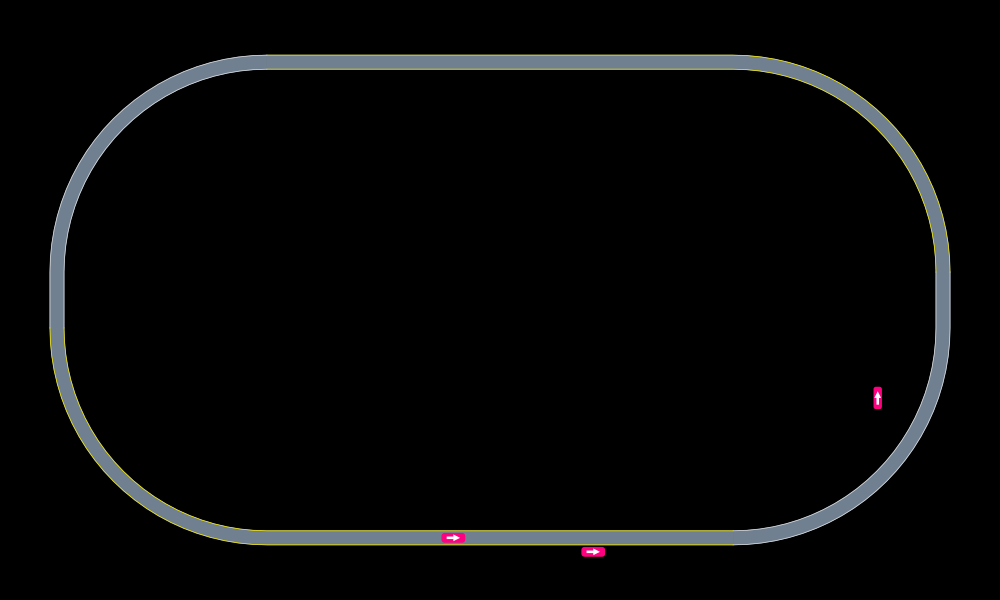

In [6]:
car_len = 4.8
car_width = 1.8

roadway = retval
scene = Scene()
push!(scene,Vehicle(VehicleState(VecSE2(131.0,30.0,pi/2.0), roadway, 29.0+randn()), 
                    VehicleDef(1, AgentClass.CAR, car_len, car_width)))
push!(scene,Vehicle(VehicleState(VecSE2(40.0,0.0,0.0), roadway, 29.0+randn()), 
                    VehicleDef(2, AgentClass.CAR, car_len, car_width)))
push!(scene,Vehicle(VehicleState(VecSE2(70.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 29.0+randn()), 
                    VehicleDef(3, AgentClass.CAR, car_len, car_width)))

render(scene, roadway, cam=FitToContentCamera())

## Roadway specs

In [ ]:
length(roadway.segments)

In [ ]:
roadway.segments[4].lanes[1].curve[1]

In [ ]:
fieldnames(roadway.segments[1].lanes[1].curve[1])

In [ ]:
roadway.segments[1].lanes[1].entrances

In [ ]:
roadway.segments[2].lanes[1].entrances

In [ ]:
roadway.segments[3].lanes[1].entrances

In [ ]:
roadway.segments[4].lanes[1].entrances

In [ ]:
function gen_straight_roadway(nlanes::Int, length::Float64=1000.0;
    origin::VecSE2 = VecSE2(0.0,0.0,0.0),
    lane_width::Float64=DEFAULT_LANE_WIDTH, # [m]
    lane_widths::Vector{Float64} = fill(lane_width, nlanes),
    boundary_leftmost::LaneBoundary=LaneBoundary(:solid, :white),
    boundary_rightmost::LaneBoundary=LaneBoundary(:solid, :white),
    boundary_middle::LaneBoundary=LaneBoundary(:broken, :white),
    )

    retval = Roadway()
    push!(retval.segments, gen_straight_segment(1, nlanes, length,
                                                origin=origin, lane_widths=lane_widths,
                                                boundary_leftmost=boundary_leftmost,
                                                boundary_rightmost=boundary_rightmost,
                                                boundary_middle=boundary_middle))
    retval
end

In [ ]:
# Generate Roadway
myRoad = Roadway()

In [ ]:
# Generate Straight Segment
seg_id = 1
nlanes = 6
segment_length = 100.0
origin = VecSE2(0.0, 0.0, 0.0)
lane_width = DEFAULT_LANE_WIDTH
lane_widths = fill(lane_width,nlanes)
boundary_leftmost = LaneBoundary(:solid,:white)
boundary_rightmost = LaneBoundary(:solid,:white)
boundary_middle = LaneBoundary(:broken,:white)

seg = RoadSegment(seg_id, Array(Lane, nlanes))
y = -lane_widths[1]/2
for i in 1 : nlanes
    y += lane_widths[i]/2
    seg.lanes[i] = Lane(LaneTag(seg_id,i), [CurvePt(body2inertial(VecSE2( 0.0, y, 0.), origin), 0.0), 
                                            CurvePt(body2inertial(VecSE2(segment_length,y,0.0), origin), segment_length)], 
    width=lane_widths[i],
    boundary_left=(i == nlanes ? boundary_leftmost : boundary_middle),
    boundary_right=(i == 1 ? boundary_rightmost : boundary_middle))
    
    y+= lane_widths[i]/2
end

# Push straight segment onto myRoad
push!(myRoad.segments, seg)
render(myRoad, canvas_height=120)

In [ ]:
myRoad.segments[1].lanes[1].entrances

In [ ]:
# fieldnames of Roadway type
fieldnames(myRoad)

In [ ]:
# fieldnames of segments
fieldnames(myRoad.segments[1])

In [ ]:
# fieldnames of lanes
fieldnames(myRoad.segments[1].lanes[1])

## Make single car drive around race track

In [2]:
## Drive single car around the racetrack


srand(0)
roadway = gen_stadium_roadway(1, radius=45.0, lane_width=4.0*DEFAULT_LANE_WIDTH)

roadind = RoadIndex(proj(VecSE2(0.0,-1*DEFAULT_LANE_WIDTH,0.0), roadway))

scene = Scene()
framerate = 24
context = IntegratedContinuous(1/framerate,3)

models = Dict{Int, DriverModel}()
carcolors = Dict{Int, Colorant}()
base_speed= 20.0


vehstate = VehicleState(Frenet(roadind, roadway), roadway, base_speed+randn())
vehdef = VehicleDef(1,AgentClass.CAR, 4.8, 1.8)
push!(scene,Vehicle(vehstate, vehdef))
models[1] = Tim2DDriver(context, rec=SceneRecord(1,context.Δt, 1))
set_desired_speed!(models[1], 30.0 + 20*rand())
carcolors[1] = colorant"red"

actions = get_actions!(Array(DriveAction, length(scene)), scene, roadway, models)

state_record = []

function drawsim(t, dt=NaN)
    get_actions!(actions, scene, roadway, models)
    tick!(scene, roadway, actions, models)
    # Store information about how far along the centerline the car has proceeded
    push!(state_record, scene.vehicles[1].state.posF.s)
    render(scene, roadway, cam=FitToContentCamera(), car_colors=carcolors)
end

drawsim (generic function with 2 methods)

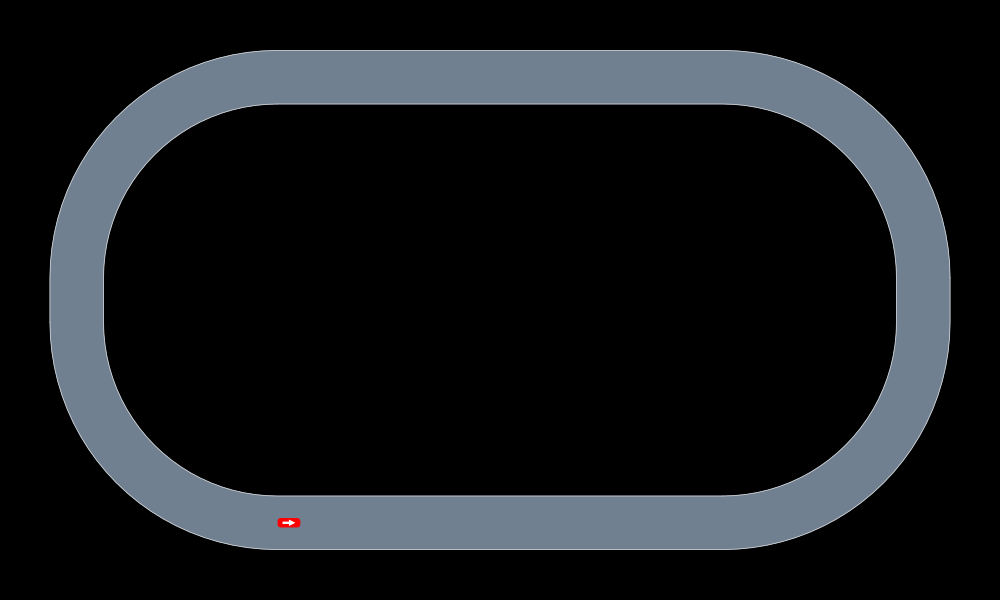

In [3]:
# using Reactive
# using Interact


ticks = fps(framerate)
timestamps = map(_ -> time(), ticks)
map(drawsim, timestamps)

In [15]:
## Projection onto the lane
myProjection = Vec.proj(scene.vehicles[1].state.posG, roadway.segments[1].lanes[1], roadway)
fieldnames(myProjection.curveproj)
myProjection.curveproj.t

4.259883972804222e-14

In [17]:
fake_posG = VecSE2(55.0, -15.0, 6.1)
fakeProjection = Vec.proj(fake_posG, roadway.segments[1].lanes[1], roadway)
fakeProjection.curveproj.t

-15.0

In [ ]:
scene.vehicles[1].state.posG

In [ ]:
fieldnames(roadway.segments[1].lanes[1])

In [ ]:
using PyPlot
plot(state_record)


In [ ]:
fieldnames(scene.vehicles[1].state)

In [ ]:
fieldnames(scene.vehicles[1].state.posG)

In [ ]:
fieldnames(scene.vehicles[1].state.posF)

In [ ]:
fieldnames(scene.vehicles[1].state.posF.roadind)

In [ ]:
scene.vehicles[1].state.posF

In [ ]:
print(scene.vehicles[1].state.posF.roadind)

In [ ]:
scene.vehicles[1].state.v

In [ ]:
state_record[1:20]

In [ ]:
state_record[140:160]